In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy import stats
from sklearn.pipeline import Pipeline
import requests
from io import BytesIO
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import xgboost as XGBRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import warnings
from pandas.api.types import is_numeric_dtype
from sklearn.utils.class_weight import compute_class_weight
warnings.filterwarnings('ignore')

In [4]:
np.random.seed(42)

# Read a random 10% sample of the data with fixed seed
df= pd.read_csv('tortilla_prices.csv', skiprows=lambda x: x > 0 and np.random.random() > 0.1)

In [5]:
df

,State,City,Year,Month,Day,Store type,Price per kilogram
0,Coahuila,Saltillo,2007,1,10,Mom and Pop Store,NaN
1,Chihuahua,Chihuahua,2007,1,10,Mom and Pop Store,10.00
2,Oaxaca,Oaxaca,2007,1,10,Mom and Pop Store,8.20
3,Querétaro,Querétaro,2007,1,10,Mom and Pop Store,9.00
4,Sonora,Cd. Obregón,2007,1,10,Mom and Pop Store,10.40
...,...,...,...,...,...,...,...
28977,Quintana Roo,Cancún,2024,10,21,Big Retail Store,13.17
28978,Sonora,Cd. Obregón,2024,10,21,Big Retail Store,15.17
28979,Tamaulipas,Cd. Victoria,2024,10,21,Big Retail Store,14.77
28980,Veracruz,Coatzacoalcos,2024,10,21,Big Retail Store,12.57


In [6]:
# Display basic information about the dataframe
print("Dataframe Info:")
print(df.info())

# Check for null values in each column
print("\nNull Values Count:")
print(df.isnull().sum())

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28982 entries, 0 to 28981
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               28982 non-null  object 
 1   City                28982 non-null  object 
 2   Year                28982 non-null  int64  
 3   Month               28982 non-null  int64  
 4   Day                 28982 non-null  int64  
 5   Store type          28982 non-null  object 
 6   Price per kilogram  28370 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 1.5+ MB
None

Null Values Count:
State                   0
City                    0
Year                    0
Month                   0
Day                     0
Store type              0
Price per kilogram    612
dtype: int64


In [7]:
# Check for other potential missing value indicators
print("\nCheck for empty strings:")
empty_strings = (df == '').sum()
print(empty_strings)

# Check for values like 'NA', 'N/A', etc.
print("\nCheck for 'NA' or 'N/A' strings:")
na_strings = ((df == 'NA') | (df == 'N/A')).sum()
print(na_strings)


Check for empty strings:
State                 0
City                  0
Year                  0
Month                 0
Day                   0
Store type            0
Price per kilogram    0
dtype: int64

Check for 'NA' or 'N/A' strings:
State                 0
City                  0
Year                  0
Month                 0
Day                   0
Store type            0
Price per kilogram    0
dtype: int64


In [8]:
 # Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [9]:
# Check the number of rows before dropping nulls
print(f"Number of rows before dropping nulls: {len(df)}")

# Drop rows with null values
df_clean = df.dropna()

# Check the number of rows after dropping nulls
print(f"Number of rows after dropping nulls: {len(df_clean)}")

# If you want to replace the original DataFrame:
df = df_clean

Number of rows before dropping nulls: 28982
Number of rows after dropping nulls: 28370


In [10]:
print("\n--- Summary Statistics ---")
print(df.describe())


--- Summary Statistics ---
               Year         Month           Day  Price per kilogram
count  28370.000000  28370.000000  28370.000000        28370.000000
mean    2015.334508      6.415086     15.832781           12.324965
std        5.107797      3.419355      8.753901            4.622351
min     2007.000000      1.000000      1.000000            3.870000
25%     2011.000000      3.000000      8.000000            9.670000
50%     2015.000000      6.000000     16.000000           11.250000
75%     2020.000000      9.000000     23.000000           14.250000
max     2024.000000     12.000000     31.000000           31.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28370 entries, 1 to 28981
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               28370 non-null  object 
 1   City                28370 non-null  object 
 2   Year                28370 non-null  int64  
 3   Month               28370 non-null  int64  
 4   Day                 28370 non-null  int64  
 5   Store type          28370 non-null  object 
 6   Price per kilogram  28370 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 1.7+ MB


In [16]:
###################################################################### EDA

Working with a 10% sample of the data: (2837, 7)

======== DATASET OVERVIEW ========
Shape: (2837, 8)

Data Types:
State                         object
City                          object
Year                           int64
Month                          int64
Day                            int64
Store type                    object
Price per kilogram           float64
Date                  datetime64[ns]
dtype: object

Missing Values:
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []

======== NUMERIC FEATURES ANALYSIS ========
Numeric Columns: ['Year', 'Month', 'Day', 'Price per kilogram']

Summary Statistics:
                     count         mean       std      min     25%      50%  \
Year                2837.0  2015.464575  4.995050  2007.00  2011.0  2015.00   
Month               2837.0     6.409588  3.490268     1.00     3.0     6.00   
Day                 2837.0    15.817413  8.762004     1.00     8.0    16.00   
Price per kilogram  2837.0    12.385784  4.58847

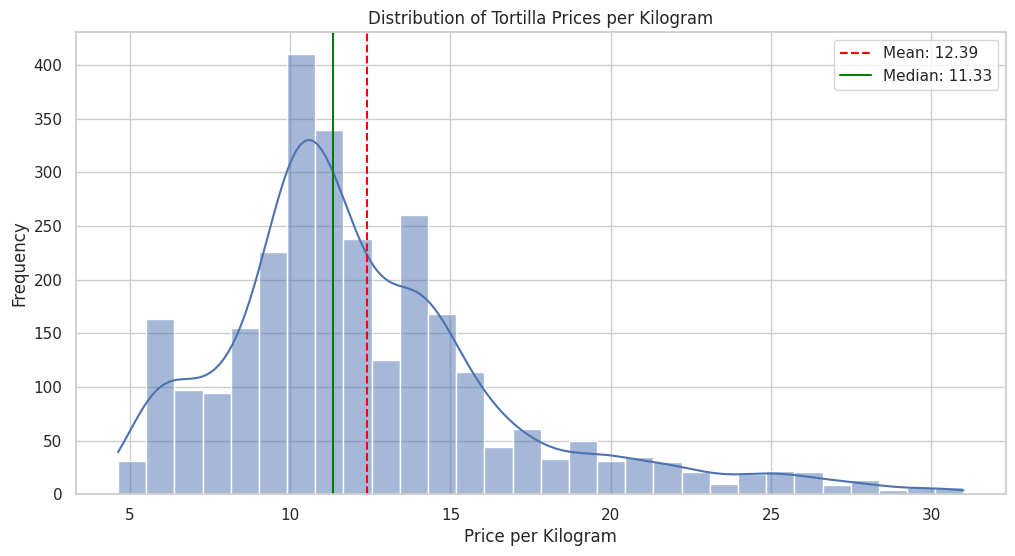

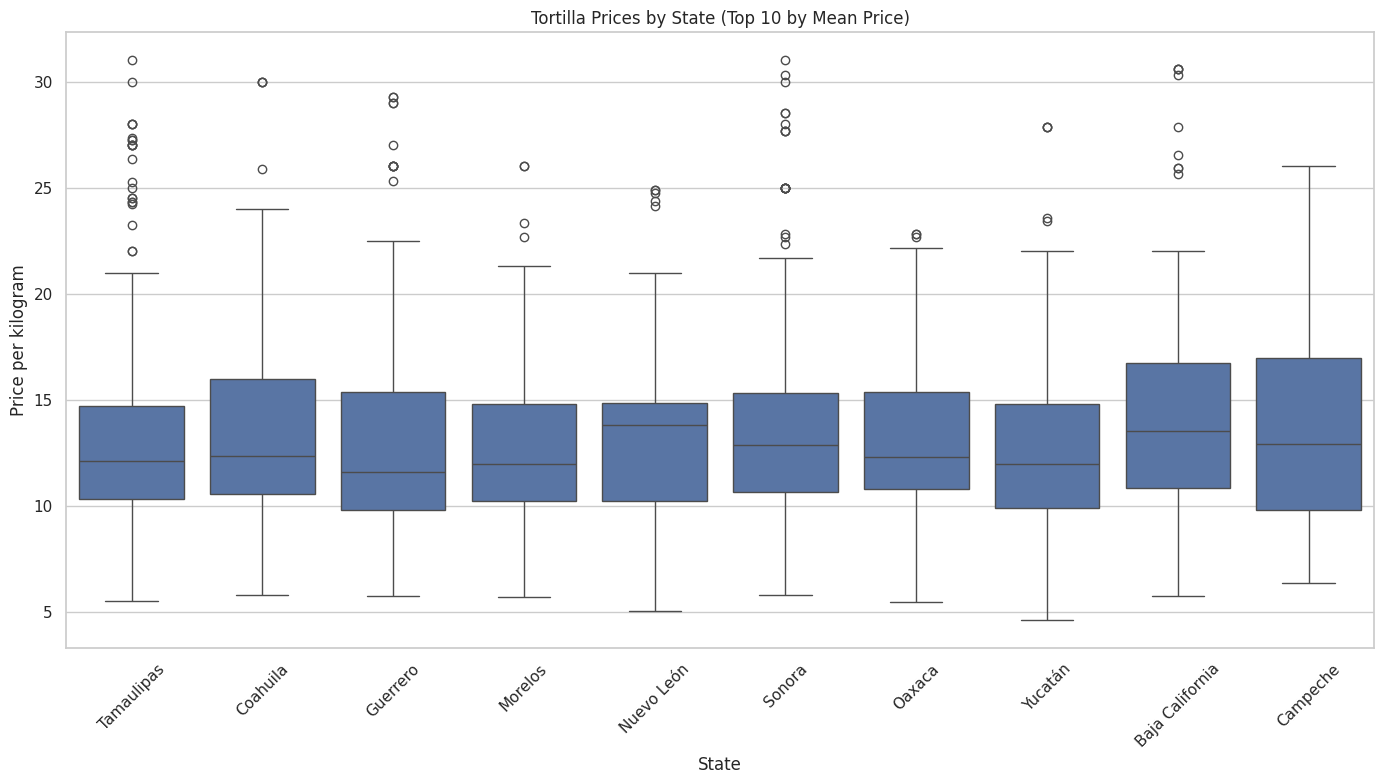

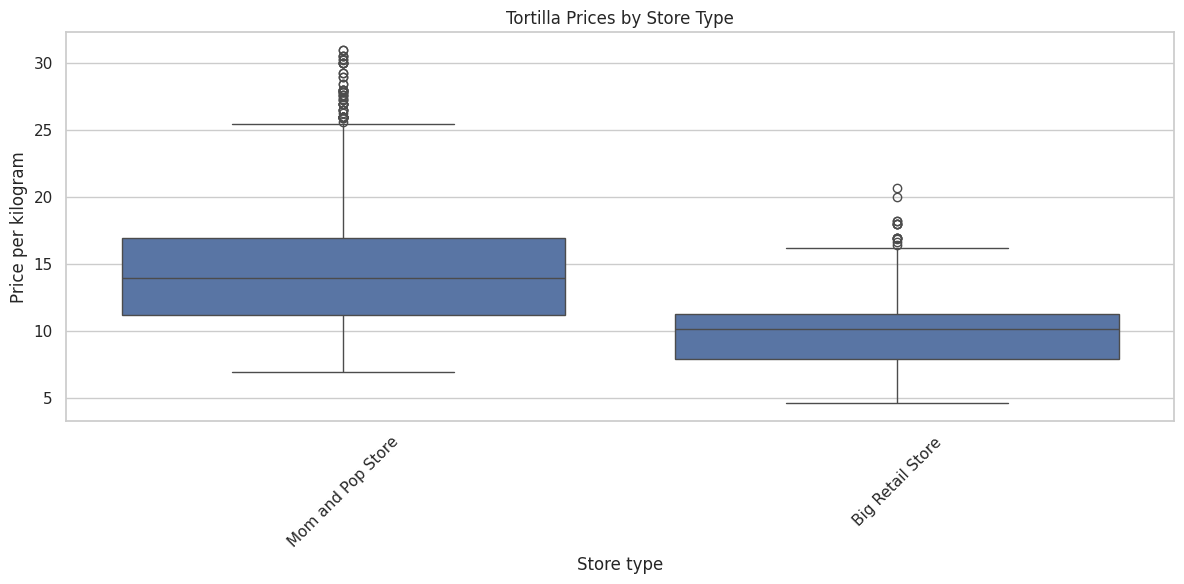

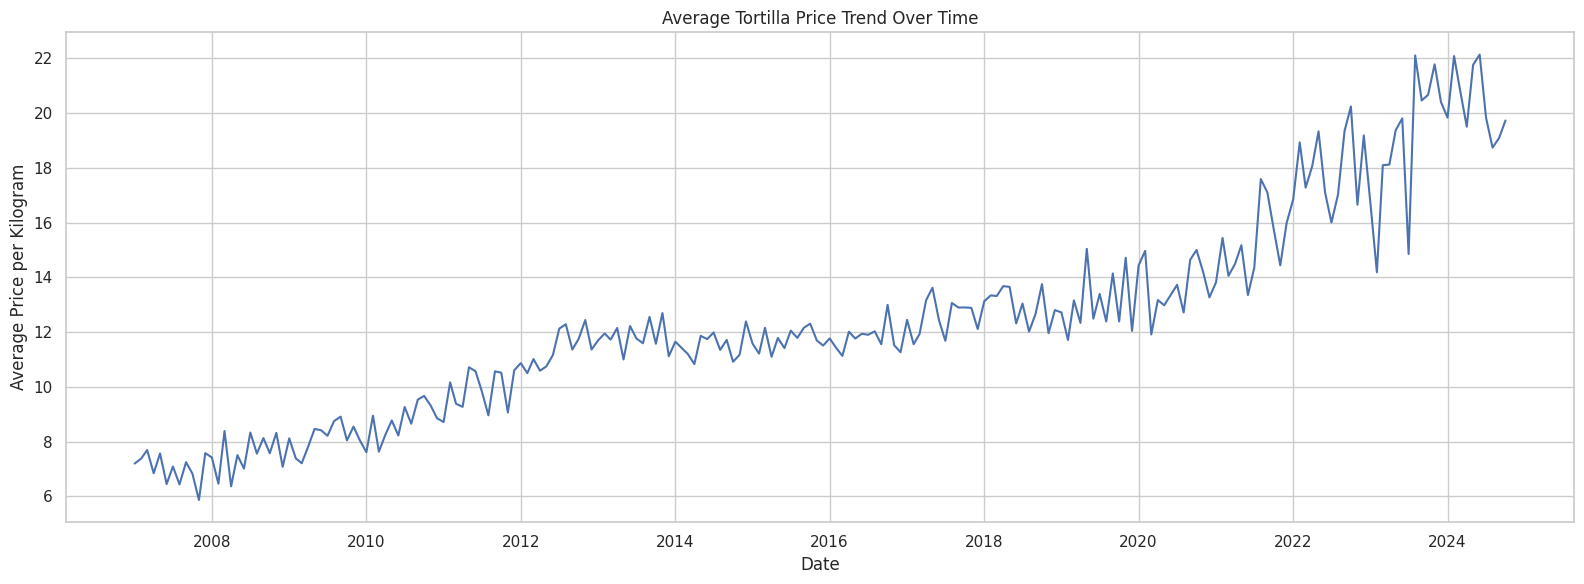

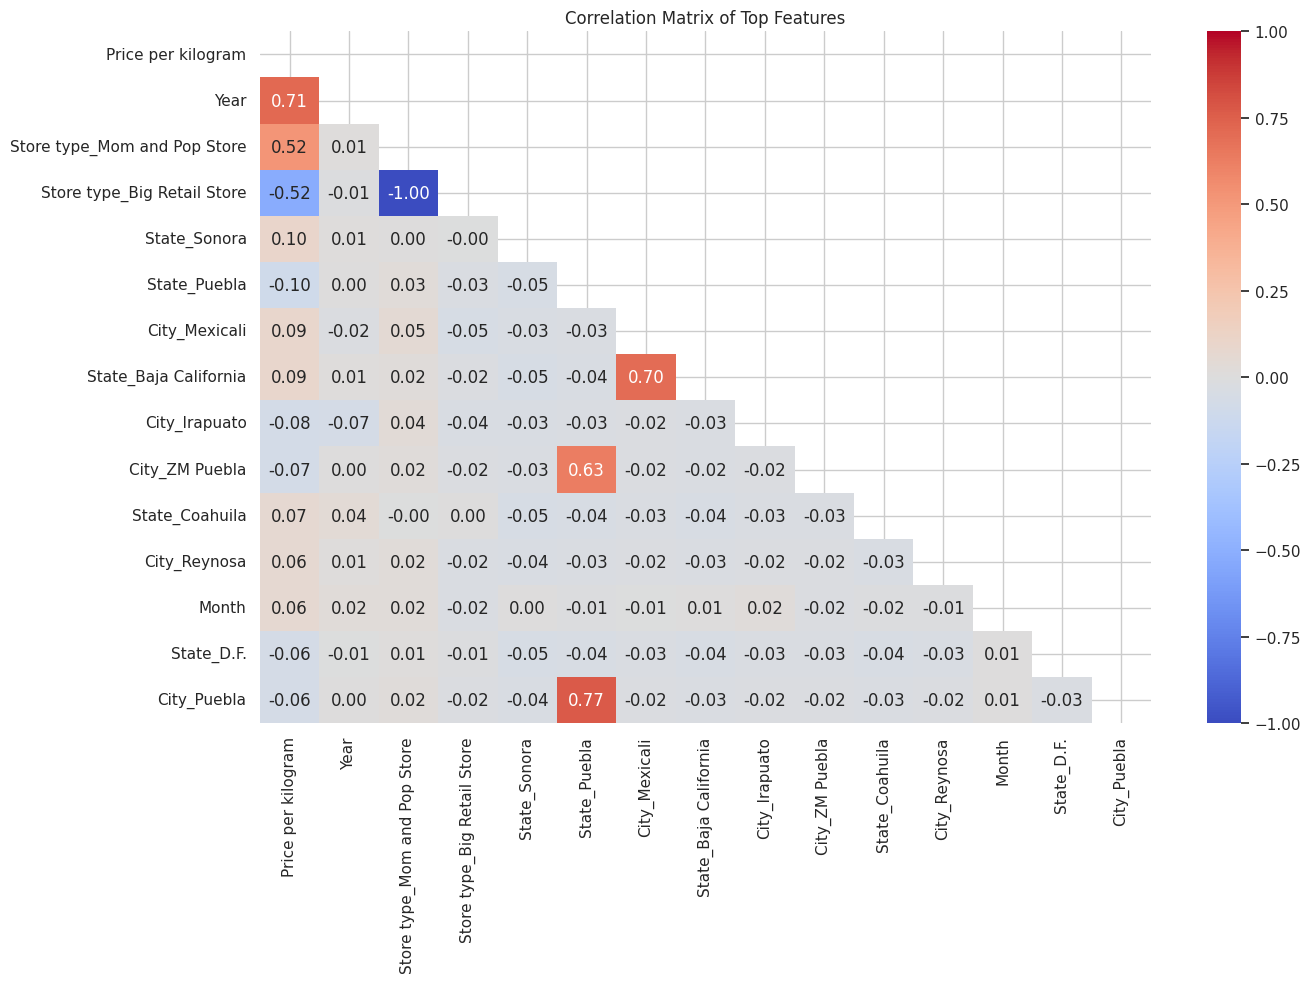


Fast EDA completed!


In [13]:
# Set better visualization settings
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Sample 10% of data to make analysis faster
np.random.seed(42)  # For reproducibility
df_sample = df.sample(frac=0.1, random_state=42)
print(f"Working with a 10% sample of the data: {df_sample.shape}")

# Create Date column if it doesn't exist
if 'Date' not in df_sample.columns:
    df_sample['Date'] = pd.to_datetime(df_sample[['Year', 'Month', 'Day']])

# 1. Basic Dataset Information
print("\n======== DATASET OVERVIEW ========")
print(f"Shape: {df_sample.shape}")
print("\nData Types:")
print(df_sample.dtypes)

print("\nMissing Values:")
missing = df_sample.isnull().sum()
missing_percent = (missing / len(df_sample)) * 100
missing_info = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percent})
print(missing_info[missing_info['Missing Values'] > 0])

# 2. Numeric Features Analysis
print("\n======== NUMERIC FEATURES ANALYSIS ========")
numeric_cols = df_sample.select_dtypes(include=['int64', 'float64']).columns
print(f"Numeric Columns: {list(numeric_cols)}")

# Summary statistics for numeric features
print("\nSummary Statistics:")
print(df_sample[numeric_cols].describe().T)

# 3. Categorical Features Analysis
print("\n======== CATEGORICAL FEATURES ANALYSIS ========")
categorical_cols = df_sample.select_dtypes(include=['object']).columns
print(f"Categorical Columns: {list(categorical_cols)}")

# Count of unique values in each categorical column
print("\nUnique Values Count:")
for col in categorical_cols:
    unique_count = df_sample[col].nunique()
    print(f"{col}: {unique_count} unique values")

# Distribution of categorical features
print("\nCategorical Distributions:")
for col in categorical_cols:
    counts = df_sample[col].value_counts()
    percentages = 100 * df_sample[col].value_counts(normalize=True)

    # Only print the top 5 categories if there are more than 5
    if len(counts) > 5:
        print(f"\n{col} (Top 5):")
        for i, (value, count) in enumerate(counts.head(5).items()):
            print(f"   {value}: {count} ({percentages.iloc[i]:.2f}%)")
        print(f"   ... and {len(counts) - 5} more categories")
    else:
        print(f"\n{col}:")
        for i, (value, count) in enumerate(counts.items()):
            print(f"   {value}: {count} ({percentages.iloc[i]:.2f}%)")

# 4. Price Analysis (assuming 'Price per kilogram' is the main target)
print("\n======== PRICE ANALYSIS ========")
price_col = 'Price per kilogram'

print(f"\n{price_col} Distribution:")
print(f"Mean: {df_sample[price_col].mean():.2f}")
print(f"Median: {df_sample[price_col].median():.2f}")
print(f"Min: {df_sample[price_col].min():.2f}")
print(f"Max: {df_sample[price_col].max():.2f}")
print(f"Standard Deviation: {df_sample[price_col].std():.2f}")

# Check for outliers
q1 = df_sample[price_col].quantile(0.25)
q3 = df_sample[price_col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df_sample[(df_sample[price_col] < lower_bound) | (df_sample[price_col] > upper_bound)]

print(f"\nOutlier Analysis for {price_col}:")
print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")
print(f"Number of Outliers: {len(outliers)} ({(len(outliers)/len(df_sample))*100:.2f}%)")

# 5. Price by State
print("\n======== PRICE BY STATE ========")
state_prices = df_sample.groupby('State')[price_col].agg(['mean', 'median', 'min', 'max', 'std', 'count'])
state_prices = state_prices.sort_values(by='mean', ascending=False)
print(state_prices.head(10))

# 6. Price by Store Type
print("\n======== PRICE BY STORE TYPE ========")
store_prices = df_sample.groupby('Store type')[price_col].agg(['mean', 'median', 'min', 'max', 'std', 'count'])
store_prices = store_prices.sort_values(by='mean', ascending=False)
print(store_prices)

# 7. Time Analysis
print("\n======== TIME ANALYSIS ========")
# Add additional time features
df_sample['Year_Month'] = df_sample['Date'].dt.to_period('M')
df_sample['DayOfWeek'] = df_sample['Date'].dt.dayofweek
df_sample['Quarter'] = df_sample['Date'].dt.quarter

# Average price by Year and Month
time_avg = df_sample.groupby('Year_Month')[price_col].mean().reset_index()
time_avg['Year_Month'] = time_avg['Year_Month'].astype(str)
print("\nPrice Trend (First 5 and Last 5 months):")
print("First 5 months:")
print(time_avg.head())
print("\nLast 5 months:")
print(time_avg.tail())

# 8. Correlation Analysis
print("\n======== CORRELATION ANALYSIS ========")
# Numerical correlations
print("\nNumerical Correlations:")
numeric_corr = df_sample[numeric_cols].corr()
print(numeric_corr)

# For categorical columns, we'll use one-hot encoding and include them in the correlation matrix
print("\nPreparing categorical data for correlation analysis...")
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df_sample[categorical_cols], drop_first=False)

# Combine with numeric features
combined_data = pd.concat([df_sample[numeric_cols], df_encoded], axis=1)

# Calculate correlations with price
price_correlations = pd.DataFrame(combined_data.corrwith(df_sample[price_col])).rename(columns={0: 'Correlation'})
price_correlations = price_correlations.sort_values('Correlation', ascending=False)
print("\nTop 10 Features Correlated with Price:")
print(price_correlations.head(10))
print("\nBottom 10 Features Correlated with Price:")
print(price_correlations.tail(10))

# 9. Visualizations

# Distribution of Prices
plt.figure(figsize=(12, 6))
sns.histplot(df_sample[price_col], kde=True, bins=30)
plt.title('Distribution of Tortilla Prices per Kilogram')
plt.xlabel('Price per Kilogram')
plt.ylabel('Frequency')
plt.axvline(df_sample[price_col].mean(), color='red', linestyle='--', label=f'Mean: {df_sample[price_col].mean():.2f}')
plt.axvline(df_sample[price_col].median(), color='green', linestyle='-', label=f'Median: {df_sample[price_col].median():.2f}')
plt.legend()
plt.show()

# Price by State (Top 10)
plt.figure(figsize=(14, 8))
top10_states = state_prices.head(10).index
sns.boxplot(x='State', y=price_col, data=df_sample[df_sample['State'].isin(top10_states)])
plt.title('Tortilla Prices by State (Top 10 by Mean Price)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Price by Store Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Store type', y=price_col, data=df_sample)
plt.title('Tortilla Prices by Store Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Price Trends Over Time
plt.figure(figsize=(16, 6))
time_plot_data = df_sample.groupby(df_sample['Date'].dt.to_period('M'))[price_col].mean().reset_index()
time_plot_data['Date'] = time_plot_data['Date'].dt.to_timestamp()
plt.plot(time_plot_data['Date'], time_plot_data[price_col])
plt.title('Average Tortilla Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price per Kilogram')
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation Heatmap (Top Features)
plt.figure(figsize=(14, 10))
# Get top correlated features (absolute value)
corr_features = price_correlations.abs().sort_values('Correlation', ascending=False).head(15).index
corr_matrix = combined_data[corr_features].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix of Top Features')
plt.tight_layout()
plt.show()

print("\nFast EDA completed!")

In [14]:
############# BUILDING REGRESSORS MODEL WITH PERFORMANCE METRICS INCLUDING FEATURE IMPORTANCE

In [15]:
# Display original columns
print("Original columns:", df.columns.tolist())

# Create Date column if it doesn't already exist
if 'Date' not in df.columns:
    df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Create YearMonth column if it doesn't already exist
if 'YearMonth' not in df.columns:
    df['YearMonth'] = df['Date'].dt.to_period('M')

# Feature Engineering
# Extract additional time-based features
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Quarter'] = df['Date'].dt.quarter
df['Month'] = df['Date'].dt.month  # Ensure Month is available

# Prepare data for modeling
# Note: We'll drop Date and YearMonth as they're not suitable for regression in their current form
X = df.drop(['Price per kilogram', 'Date', 'YearMonth', 'Day'], axis=1)
y = df['Price per kilogram']

# Display columns used for modeling
print("\nColumns used for modeling:")
print(X.columns.tolist())

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nCategorical columns:", categorical_cols)
print("Numerical columns:", numeric_cols)

# Create preprocessor with one-hot encoding for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Define the three regression models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}



Original columns: ['State', 'City', 'Year', 'Month', 'Day', 'Store type', 'Price per kilogram']

Columns used for modeling:
['State', 'City', 'Year', 'Month', 'Store type', 'DayOfWeek', 'Quarter']

Categorical columns: ['State', 'City', 'Store type']
Numerical columns: ['Year']


In [17]:
############# BUILDING REGRESSORS MODEL WITH PERFORMANCE METRICS INCLUDING FEATURE IMPORTANCE


--- Model Training and Evaluation ---

Training Linear Regression...
MSE: 3.6405
RMSE: 1.9080
MAE: 1.3961
R2 Score: 0.8298
Cross-Validation R2: 0.5414 (±0.0851)

Training Random Forest...
MSE: 0.2400
RMSE: 0.4899
MAE: 0.2671
R2 Score: 0.9888
Cross-Validation R2: 0.5328 (±0.2600)

Training Gradient Boosting...
MSE: 1.0916
RMSE: 1.0448
MAE: 0.7656
R2 Score: 0.9490
Cross-Validation R2: 0.4595 (±0.3470)

--- Model Comparison ---
                        MSE      RMSE       MAE        R2  CV_R2_mean  \
Linear Regression  3.640485  1.908005  1.396111  0.829806    0.541388   
Random Forest      0.240024  0.489923  0.267107  0.988779    0.532839   
Gradient Boosting  1.091600  1.044797  0.765575  0.948967    0.459477   

                   CV_R2_std  
Linear Regression   0.085147  
Random Forest       0.259965  
Gradient Boosting   0.346998  


<Figure size 1200x800 with 0 Axes>

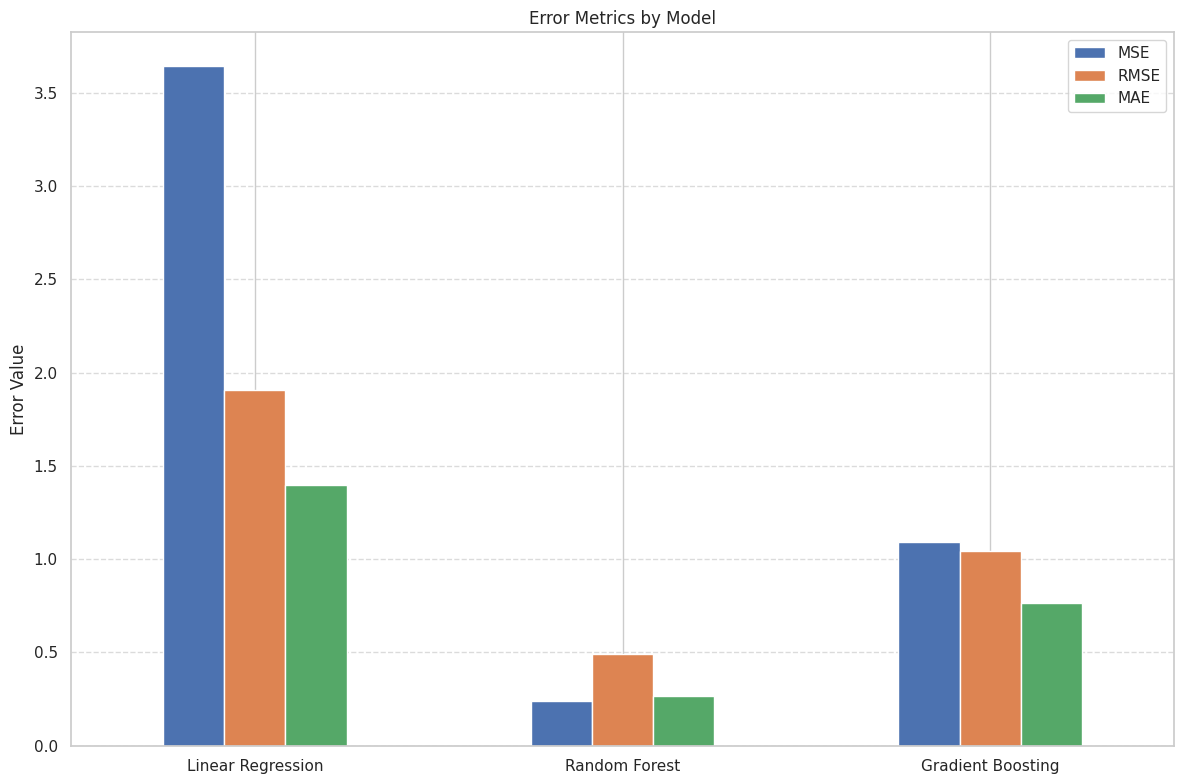

<Figure size 1200x800 with 0 Axes>

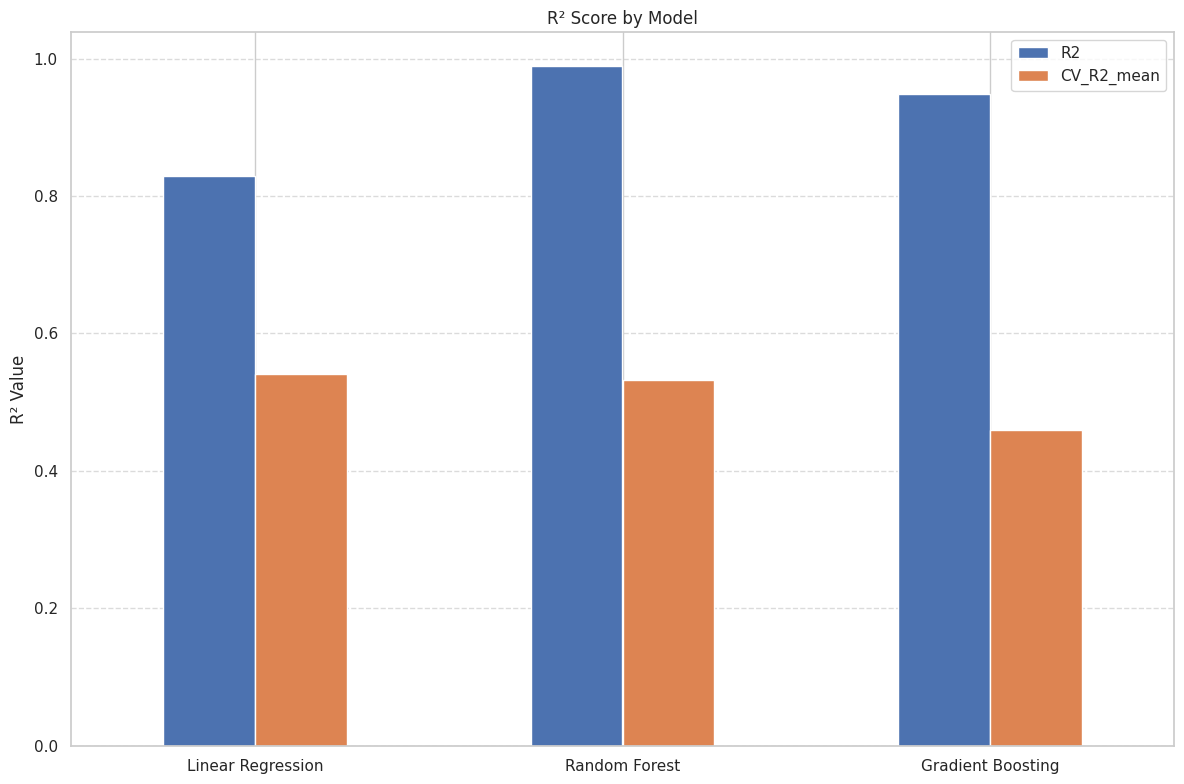

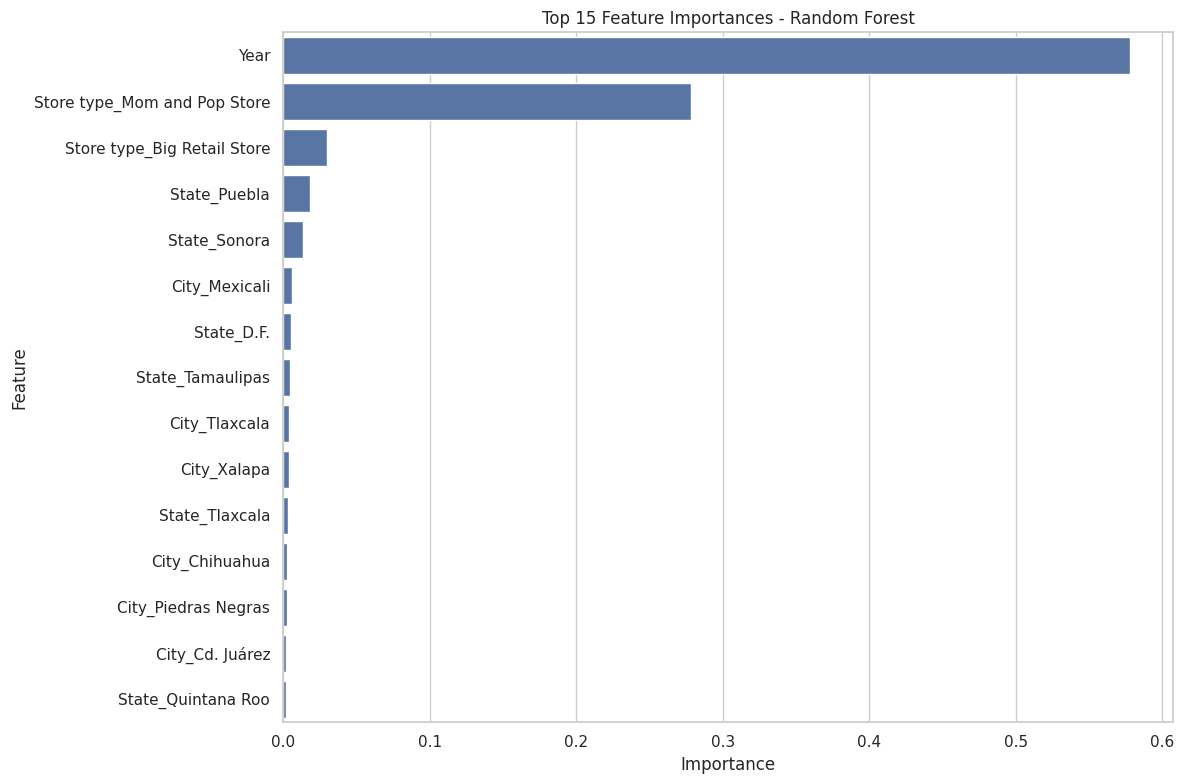

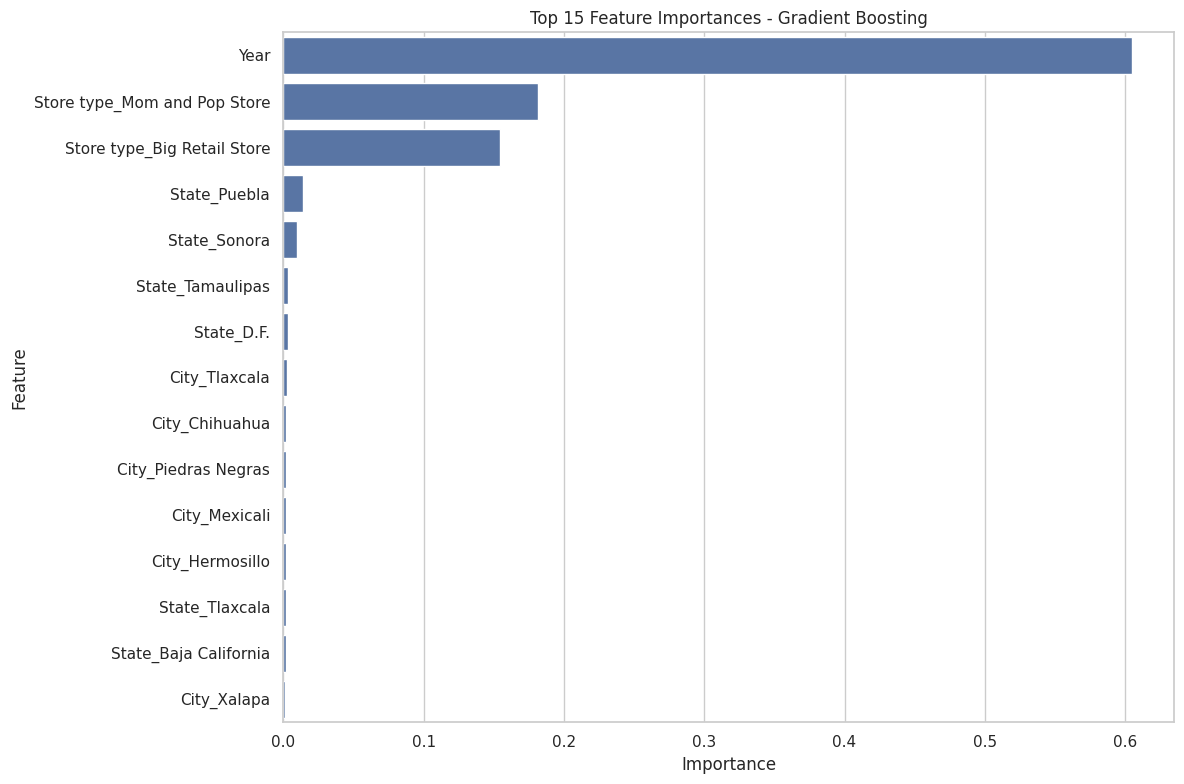


Analysis complete! Regression models built, compared, and feature importances analyzed.


In [18]:
# Create pipelines for each model
pipelines = {name: Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', model)])
             for name, model in models.items()}

# Train and evaluate each model
results = {}
feature_importances = {}

print("\n--- Model Training and Evaluation ---")
for name, pipeline in pipelines.items():
    print(f"\nTraining {name}...")

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Cross-validation score
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')

    # Store results
    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'CV_R2_mean': cv_scores.mean(),
        'CV_R2_std': cv_scores.std()
    }

    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R2 Score: {r2:.4f}")
    print(f"Cross-Validation R2: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

    # Get feature importances for tree-based models
    if name in ['Random Forest', 'Gradient Boosting']:
        # Get the model from the pipeline
        model = pipeline.named_steps['model']

        # Get the column names after one-hot encoding
        ohe = pipeline.named_steps['preprocessor'].named_transformers_['cat']
        if hasattr(ohe, 'get_feature_names_out'):
            cat_features = ohe.get_feature_names_out(categorical_cols).tolist()
        else:
            # Fallback for older scikit-learn versions
            cat_features = ohe.get_feature_names(categorical_cols).tolist()

        feature_names = numeric_cols + cat_features

        # Get feature importances
        importances = model.feature_importances_

        # Store importances in a DataFrame
        feature_importances[name] = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values('Importance', ascending=False)

# Compare models
print("\n--- Model Comparison ---")
results_df = pd.DataFrame(results).T
print(results_df)

# Visualize model comparison
plt.figure(figsize=(12, 8))
results_df[['MSE', 'RMSE', 'MAE']].plot(kind='bar')
plt.title('Error Metrics by Model')
plt.ylabel('Error Value')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('model_error_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 8))
results_df[['R2', 'CV_R2_mean']].plot(kind='bar')
plt.title('R² Score by Model')
plt.ylabel('R² Value')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('model_r2_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualize feature importances for tree-based models
for name, importance_df in feature_importances.items():
    # Only show top 15 features
    top_features = importance_df.head(15)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=top_features)
    plt.title(f'Top 15 Feature Importances - {name}')
    plt.tight_layout()
    plt.savefig(f'{name.lower().replace(" ", "_")}_feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()

print("\nAnalysis complete! Regression models built, compared, and feature importances analyzed.")

In [19]:
#shap
!pip install shap

In [20]:
############### EXPLAINABLE AI FOR REGRESSOR -SHAPE

Number of features after transformation: 91
Successfully converted to float64
Successfully calculated SHAP values


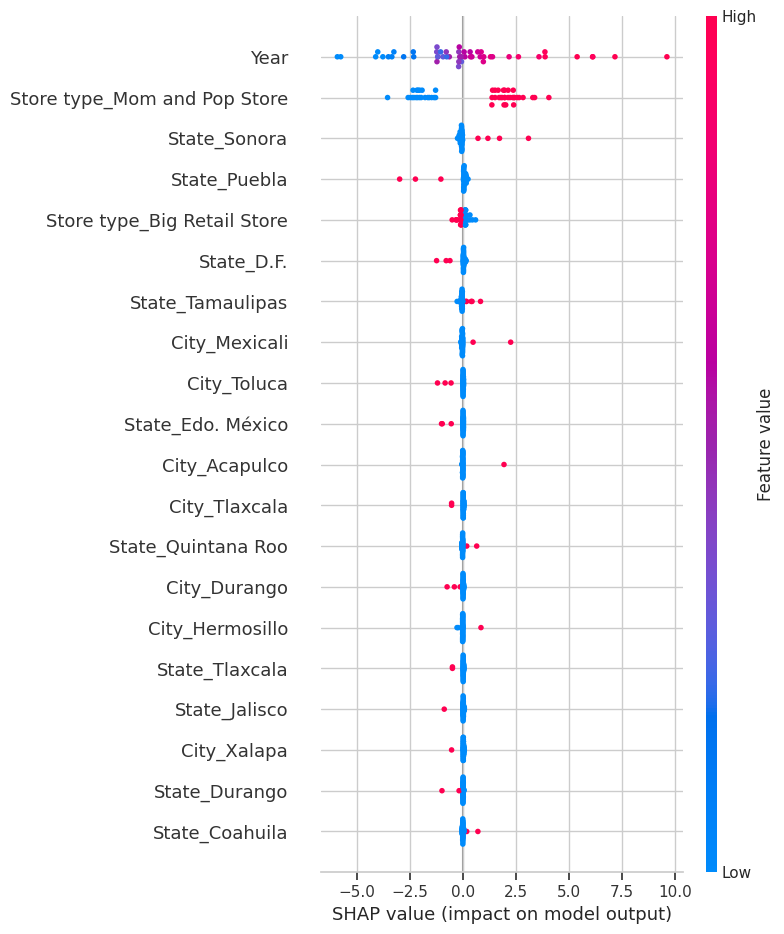

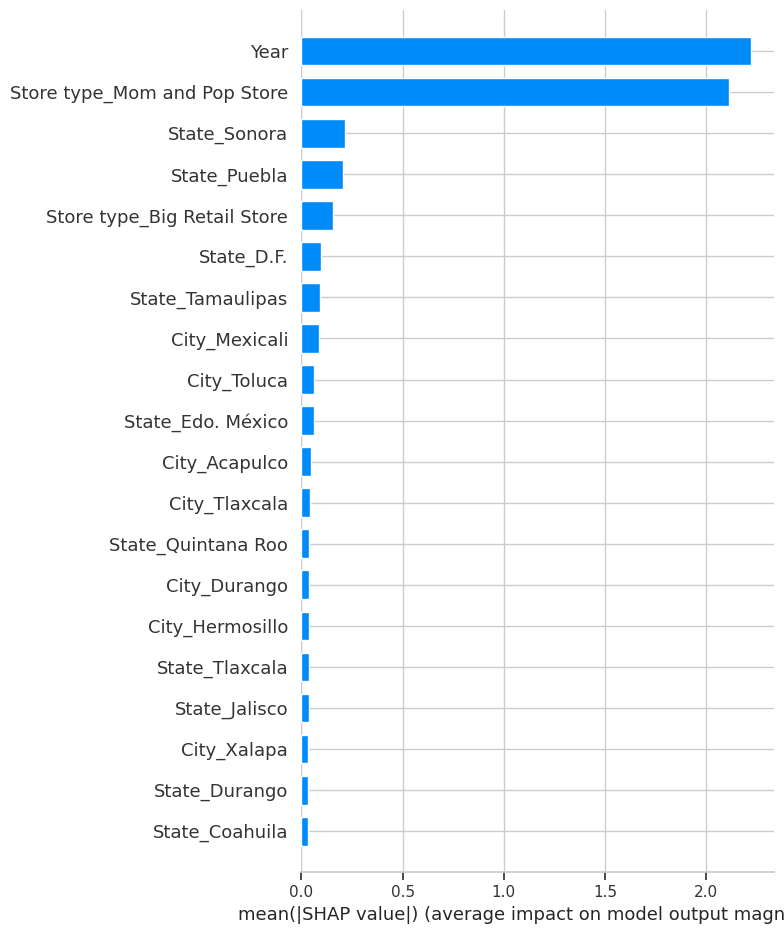


Top 20 Most Important Features:
                         Feature  Importance
0                           Year    2.224782
90  Store type_Mom and Pop Store    2.115740
26                  State_Sonora    0.214241
21                  State_Puebla    0.206880
89   Store type_Big Retail Store    0.154799
9                     State_D.F.    0.094509
28              State_Tamaulipas    0.091650
57                 City_Mexicali    0.086916
78                   City_Toluca    0.062204
11             State_Edo. México    0.060591
33                 City_Acapulco    0.049312
77                 City_Tlaxcala    0.041633
23            State_Quintana Roo    0.039367
49                  City_Durango    0.038396
52               City_Hermosillo    0.038297
29                State_Tlaxcala    0.038147
15                 State_Jalisco    0.037789
83                   City_Xalapa    0.034740
10                 State_Durango    0.034713
7                 State_Coahuila    0.033122


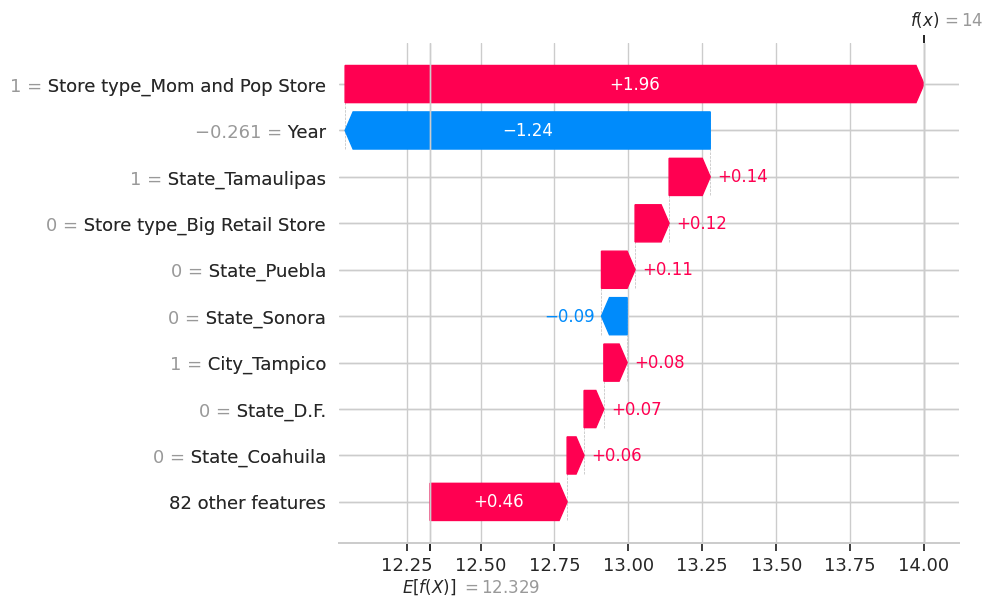

In [21]:

import shap


# 1. Take a small sample of your data to reduce memory usage
X_sample = X_train.sample(n=50, random_state=42)
y_sample = y_train.loc[X_sample.index]

# 2. Transform the sample data correctly
X_transformed = pipelines['Random Forest'].named_steps['preprocessor'].transform(X_sample)

# 3. Get just the RandomForest model itself (not the pipeline)
rf_model = pipelines['Random Forest'].named_steps['model']

# 4. Get feature names after transformation
# Extract feature names from the preprocessor
preprocessor = pipelines['Random Forest'].named_steps['preprocessor']
ohe = preprocessor.named_transformers_['cat']

# Get original column names
numeric_feature_names = numeric_cols
if hasattr(ohe, 'get_feature_names_out'):
    categorical_feature_names = ohe.get_feature_names_out(categorical_cols)
else:
    # For older scikit-learn versions
    categorical_feature_names = ohe.get_feature_names(categorical_cols)

# Combine all feature names in the correct order
feature_names = numeric_feature_names + list(categorical_feature_names)
print(f"Number of features after transformation: {len(feature_names)}")

# 5. Convert the transformed data to proper format
if hasattr(X_transformed, 'toarray'):
    X_dense = X_transformed.toarray()
else:
    X_dense = X_transformed

# Force conversion to float64
try:
    X_numeric = X_dense.astype(np.float64)
    print("Successfully converted to float64")
except Exception as e:
    print(f"Conversion error: {e}")
    # Using alternative approach with KernelExplainer
    print("Falling back to KernelExplainer...")

    background = X_sample.iloc[:50]  # Use 50 examples as background
    predict_fn = pipelines['Random Forest'].predict

    kernel_explainer = shap.KernelExplainer(predict_fn, background)
    kernel_shap = kernel_explainer.shap_values(X_sample.iloc[:10])

    # Plot results with original feature names
    shap.summary_plot(kernel_shap, X_sample.iloc[:10])

    # Skip the rest of the code
    import sys
    sys.exit()

# 6. Create explainer and calculate values
try:
    explainer = shap.TreeExplainer(rf_model)
    shap_values = explainer.shap_values(X_numeric)
    print("Successfully calculated SHAP values")

    # 7. Create SHAP plots with feature names
    # Summary plot
    plt.figure(figsize=(10, 8))
    shap.summary_plot(shap_values, X_numeric, feature_names=feature_names)

    # Bar plot of feature importance
    plt.figure(figsize=(10, 8))
    shap.summary_plot(shap_values, X_numeric, plot_type="bar", feature_names=feature_names)

    # 8. Create a DataFrame with feature importances for better reference
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': np.abs(shap_values).mean(0)
    }).sort_values('Importance', ascending=False)

    print("\nTop 20 Most Important Features:")
    print(feature_importance.head(20))

    # 9. Display waterfall plot for first prediction with feature names
    plt.figure(figsize=(10, 8))
    shap.waterfall_plot(shap.Explanation(values=shap_values[0],
                                         base_values=explainer.expected_value,
                                         data=X_numeric[0],
                                         feature_names=feature_names))

except Exception as e:
    print(f"SHAP error: {e}")
    print("Falling back to alternative approach...")

    # If TreeExplainer failed, use the model-agnostic KernelExplainer
    background = shap.maskers.Independent(X_sample, max_samples=100)
    explainer = shap.Explainer(pipelines['Random Forest'].predict, background)

    # Only compute for a few examples to keep it fast
    shap_values = explainer(X_sample.iloc[:10])

    # Plot with original feature names
    shap.plots.beeswarm(shap_values)
    shap.plots.bar(shap_values)

In [22]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=a211f0216cfdd540bbeca7c4159b89982cb13b32661adde76151555844f3ffae
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [23]:
# Import necessary libraries
import lime
import lime.lime_tabular

In [24]:
################################ EXPLAINABLE AI FOR REGRESSOR- LIME

<Figure size 1000x600 with 0 Axes>

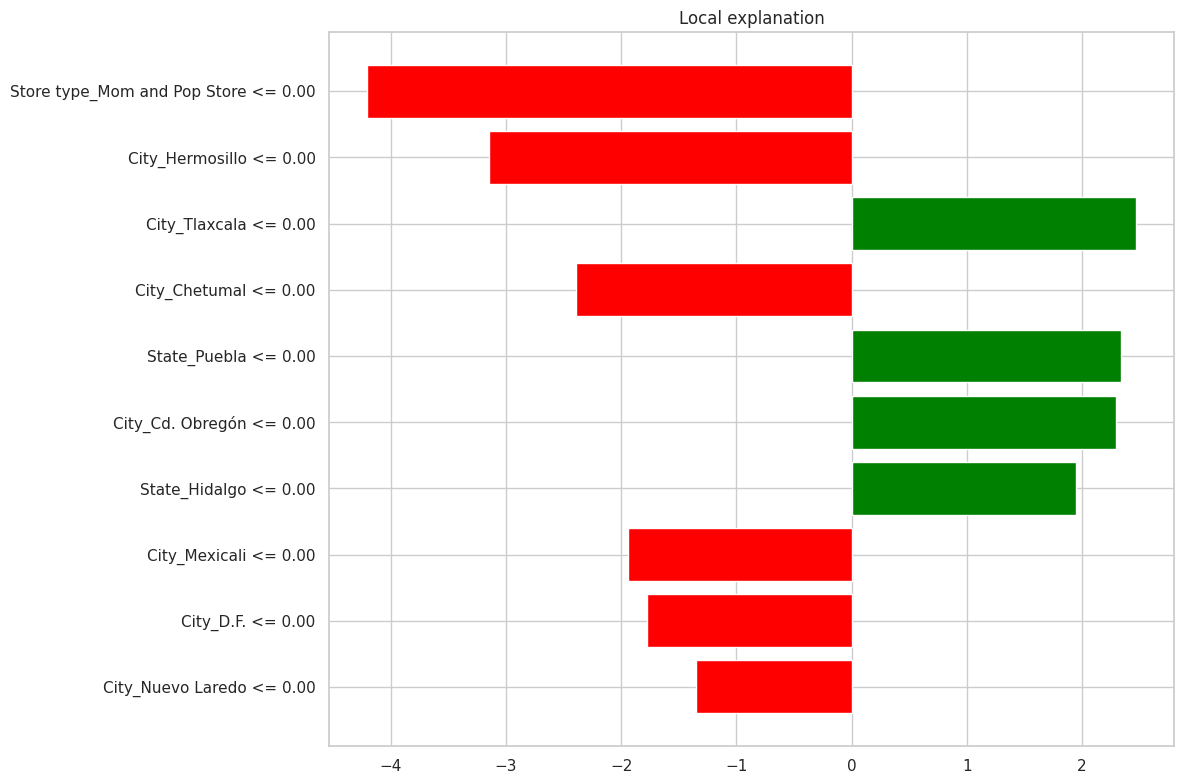


LIME Explanation Details:
Store type_Mom and Pop Store <= 0.00: -4.2052
City_Hermosillo <= 0.00: -3.1464
City_Tlaxcala <= 0.00: 2.4655
City_Chetumal <= 0.00: -2.3898
State_Puebla <= 0.00: 2.3385
City_Cd. Obregón <= 0.00: 2.2921
State_Hidalgo <= 0.00: 1.9516
City_Mexicali <= 0.00: -1.9390
City_D.F. <= 0.00: -1.7751
City_Nuevo Laredo <= 0.00: -1.3508


In [26]:

# 1. Set up a function that uses the random forest model directly
# (after preprocessing is already done)
def rf_predict(x):
    return rf_model.predict(x)

# 2. Get a sample of preprocessed data for the LIME explainer
# First, transform a small sample of training data
X_train_small = X_train.sample(50, random_state=42)
X_train_transformed = preprocessor.transform(X_train_small)

# Convert to dense array if sparse
if hasattr(X_train_transformed, 'toarray'):
    X_train_transformed = X_train_transformed.toarray()
X_train_transformed = X_train_transformed.astype(np.float64)

# 3. Transform the instance we want to explain
import random

random_index = random.choice(X_test.index)

instance = X_test.loc[[random_index]]
instance_transformed = preprocessor.transform(instance)
if hasattr(instance_transformed, 'toarray'):
    instance_transformed = instance_transformed.toarray()
instance_transformed = instance_transformed.astype(np.float64)

# 4. Get feature names after transformation
# For categorical columns that have been one-hot encoded
ohe = preprocessor.named_transformers_['cat']
if hasattr(ohe, 'get_feature_names_out'):
    cat_feature_names = ohe.get_feature_names_out(categorical_cols)
else:
    # For older scikit-learn versions
    cat_feature_names = ohe.get_feature_names(categorical_cols)

# Combine with numeric column names
feature_names = numeric_cols + list(cat_feature_names)

# 5. Create the LIME explainer with the preprocessed data
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train_transformed,
    feature_names=feature_names,
    mode="regression",
    verbose=False
)

# 6. Generate explanation
explanation = explainer.explain_instance(
    instance_transformed[0],
    rf_predict,
    num_features=10,
    num_samples=500
)

# 7. Display explanation
plt.figure(figsize=(10, 6))
explanation.as_pyplot_figure()
plt.tight_layout()
plt.show()

# 8. Print the explanation details
print("\nLIME Explanation Details:")
for feature, importance in explanation.as_list():
    print(f"{feature}: {importance:.4f}")

In [27]:
############################### CLASSIFIERS MODELS WITH PERFORMANCES METRCIS INCLUDING FEATURE IMPORTANCE

In [28]:
df['Store type'].unique()

array(['Mom and Pop Store', 'Big Retail Store'], dtype=object)

In [29]:
# For both count and percentage
print("Class Distribution:")
count = df['Store type'].value_counts()
percent = df['Store type'].value_counts(normalize=True) * 10
for i, value in enumerate(count.index):
    print(f"{value}: {count[i]} ({percent[i]:.2f}%)")

Class Distribution:
Mom and Pop Store: 14243 (5.02%)
Big Retail Store: 14127 (4.98%)


In [30]:
############################### CLASSIFIERS MODELS WITH PERFORMANCES METRCIS INCLUDING FEATURE IMPORTANCE


Training Random Forest...
Accuracy: 0.9958
Cross-Validation Accuracy: 0.8409 (±0.0875)


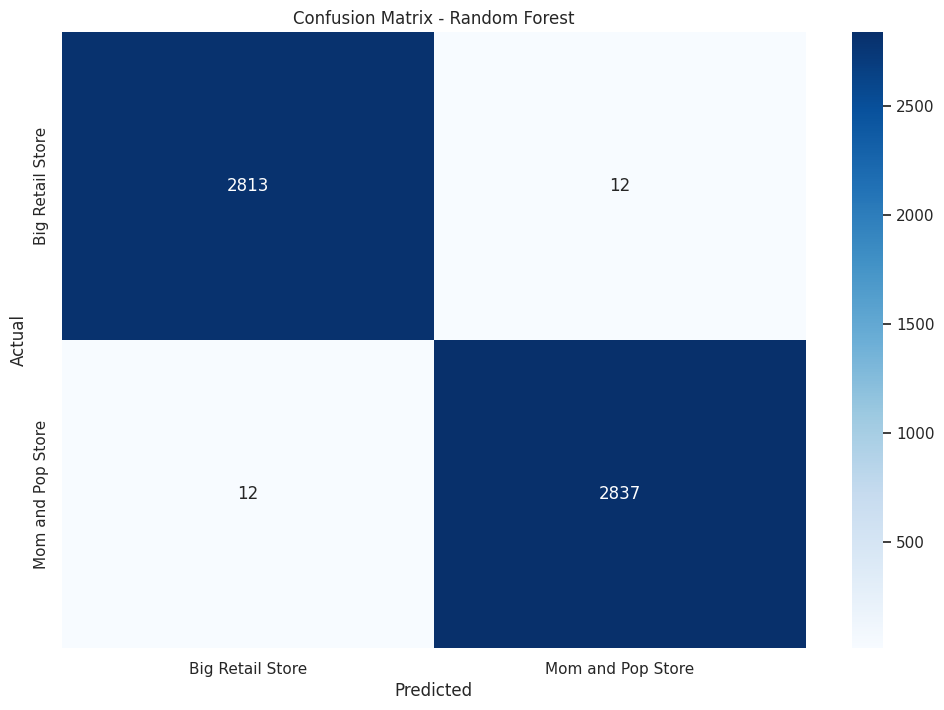


Classification Report:
                   precision    recall  f1-score   support

 Big Retail Store       1.00      1.00      1.00      2825
Mom and Pop Store       1.00      1.00      1.00      2849

         accuracy                           1.00      5674
        macro avg       1.00      1.00      1.00      5674
     weighted avg       1.00      1.00      1.00      5674


Training Gradient Boosting...
Accuracy: 0.9605
Cross-Validation Accuracy: 0.7970 (±0.0787)


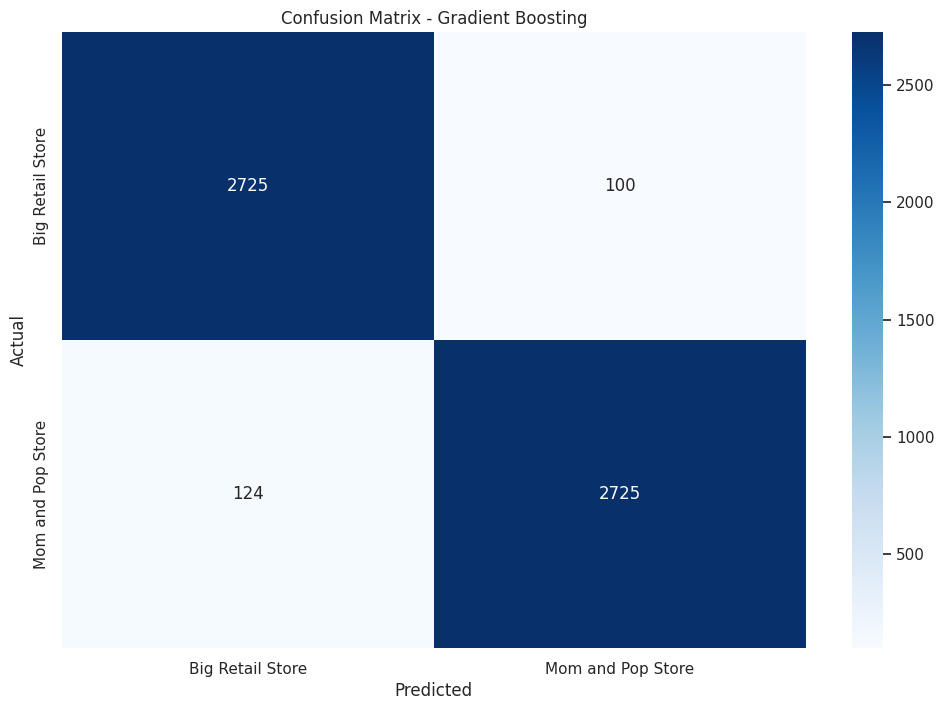


Classification Report:
                   precision    recall  f1-score   support

 Big Retail Store       0.96      0.96      0.96      2825
Mom and Pop Store       0.96      0.96      0.96      2849

         accuracy                           0.96      5674
        macro avg       0.96      0.96      0.96      5674
     weighted avg       0.96      0.96      0.96      5674


Training Logistic Regression...
Accuracy: 0.9519
Cross-Validation Accuracy: 0.9077 (±0.0297)


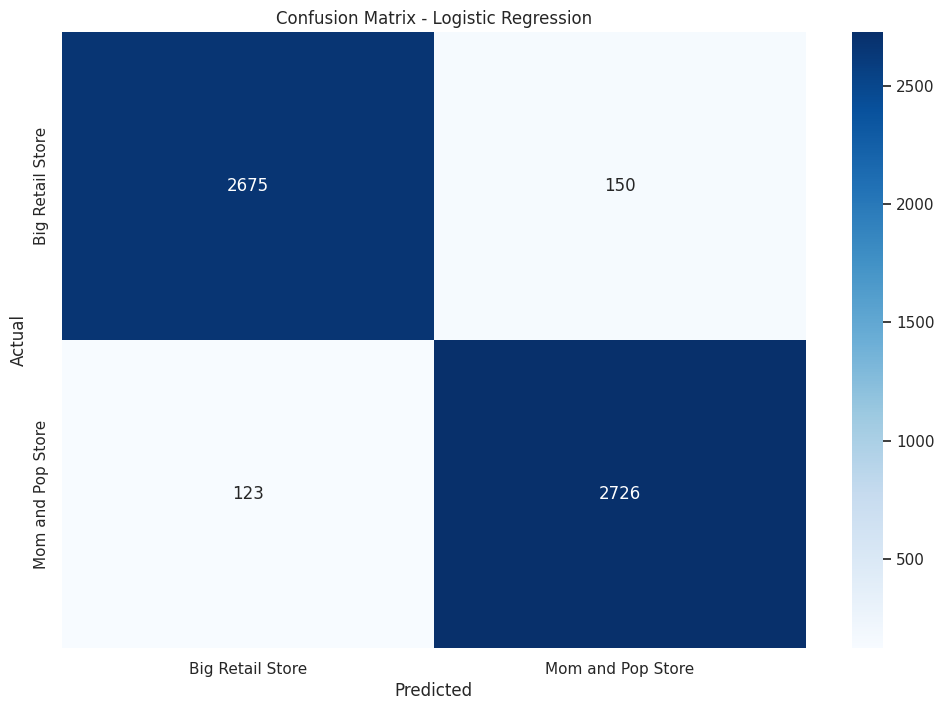


Classification Report:
                   precision    recall  f1-score   support

 Big Retail Store       0.96      0.95      0.95      2825
Mom and Pop Store       0.95      0.96      0.95      2849

         accuracy                           0.95      5674
        macro avg       0.95      0.95      0.95      5674
     weighted avg       0.95      0.95      0.95      5674


--- Model Comparison ---
                     Accuracy  CV_Accuracy
Random Forest        0.995770     0.840888
Gradient Boosting    0.960522     0.796969
Logistic Regression  0.951886     0.907684


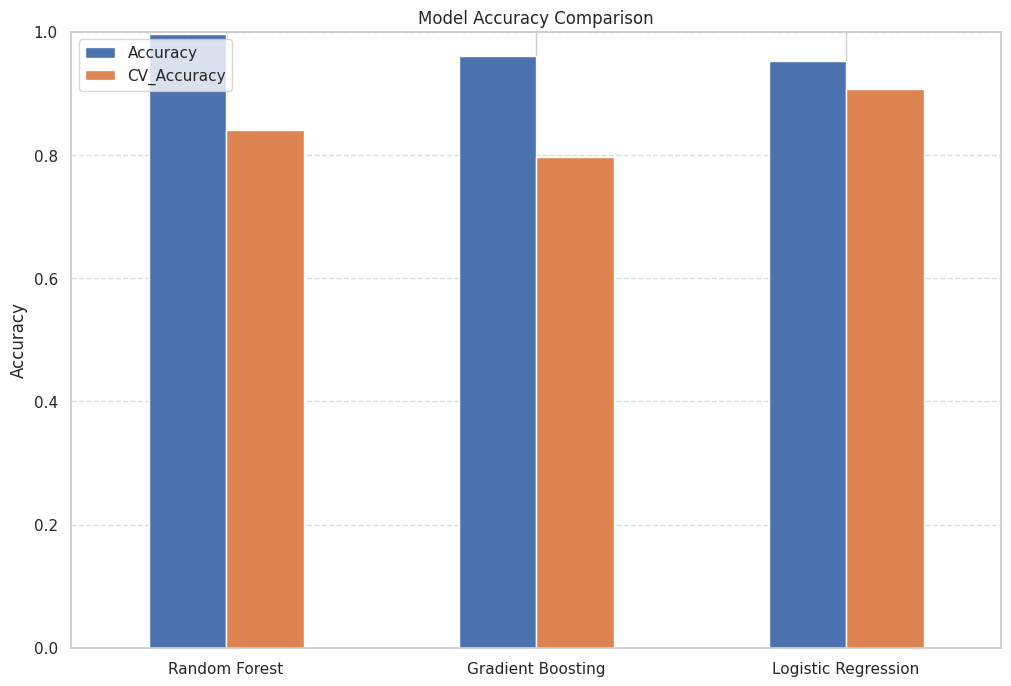

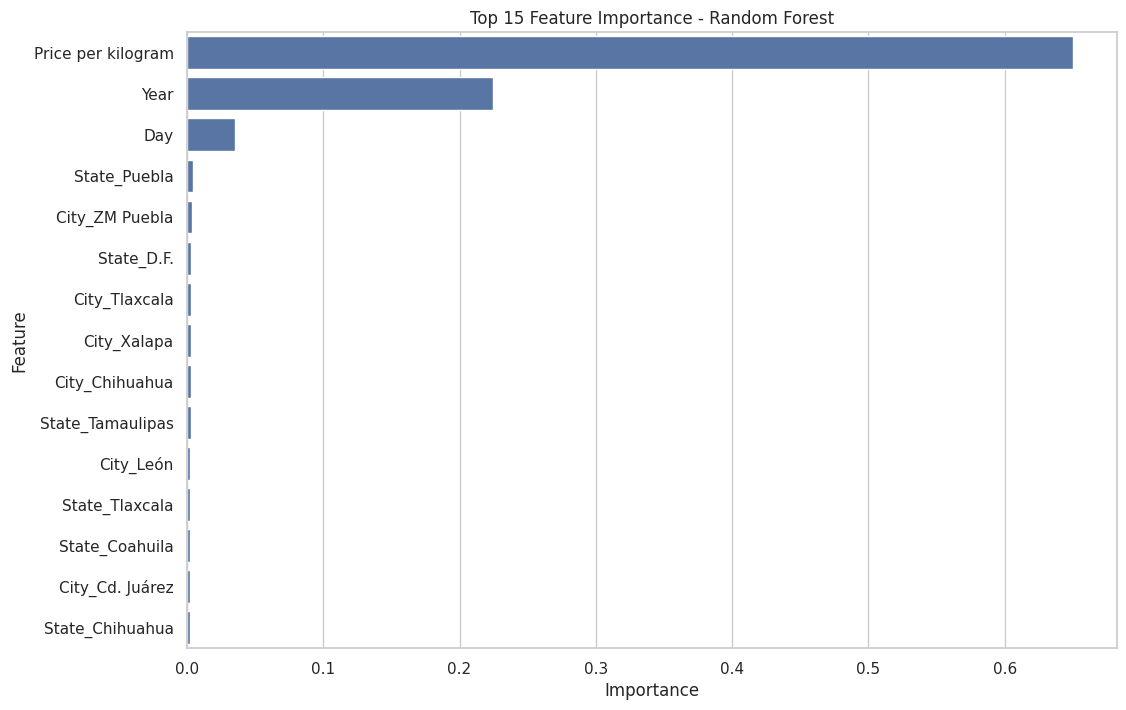

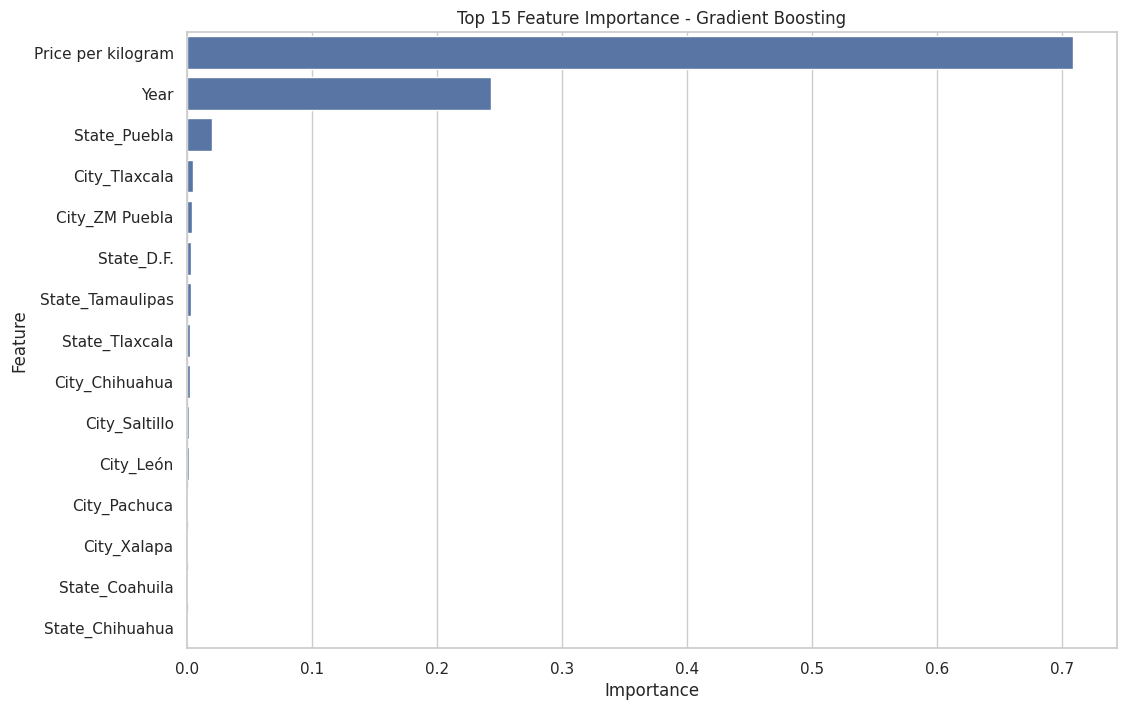

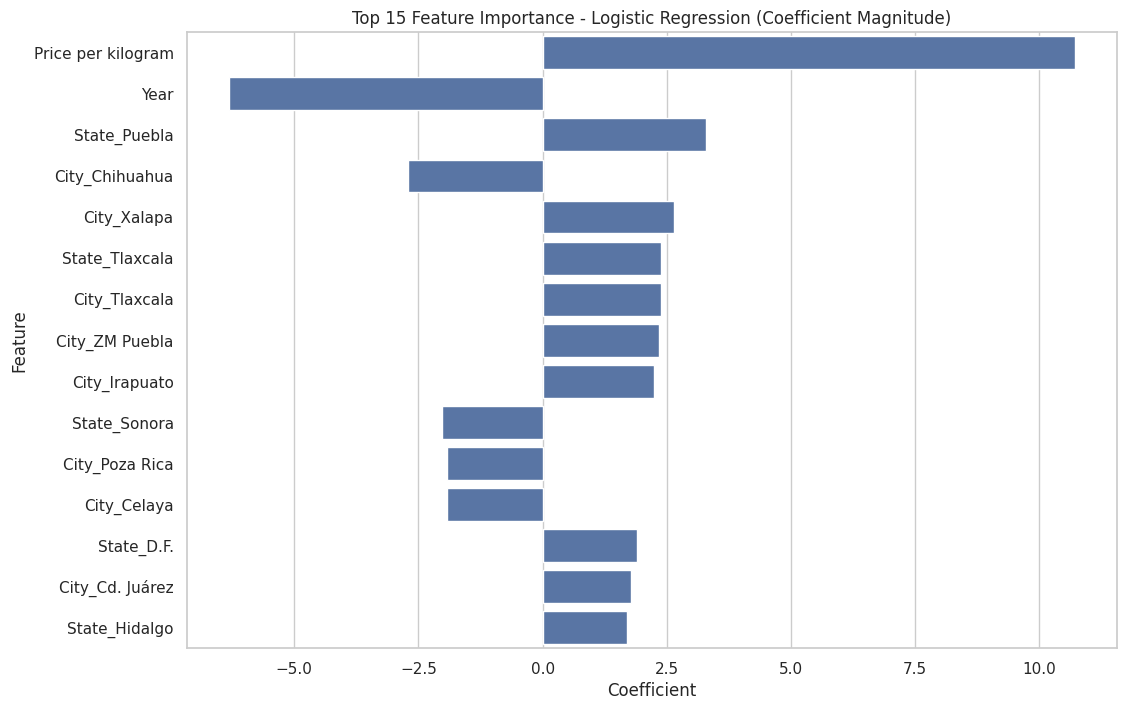


Classification task complete!


In [31]:
# 1. Data Preparation
df_clean = df.dropna()
df = df_clean

# Create Date column if it doesn't already exist
if 'Date' not in df.columns:
    df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Create additional time-based features
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Quarter'] = df['Date'].dt.quarter
df['Month'] = df['Date'].dt.month

# 2. Define features and target
X = df.drop(['Store type', 'Date', 'YearMonth'], axis=1)
y = df['Store type']

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights_dict = dict(zip(np.unique(y), class_weights))

# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 5. Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# 6. Define the classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=50, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=100, random_state=42, class_weight=class_weights_dict)
}

# 7. Create pipelines
pipelines = {name: Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', clf)
]) for name, clf in classifiers.items()}

# 8. Train, Evaluate, and Analyze
results = {}
feature_importances = {}

for name, pipeline in pipelines.items():
    print(f"\nTraining {name}...")

    # Handle sample weights for Gradient Boosting
    if name == 'Gradient Boosting':
        sample_weights = [class_weights_dict[label] for label in y_train]
        pipeline.fit(X_train, y_train, classifier__sample_weight=sample_weights)  # Pass sample weights here
    else:
        pipeline.fit(X_train, y_train)  # Normal fit for other classifiers

    y_pred = pipeline.predict(X_test)

    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    results[name] = {'Accuracy': accuracy, 'CV_Accuracy_Mean': cv_scores.mean(), 'CV_Accuracy_Std': cv_scores.std()}
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Feature Importance (for tree-based models and Logistic Regression)
    if name in ['Random Forest', 'Gradient Boosting']:
        model = pipeline.named_steps['classifier']
        ohe = pipeline.named_steps['preprocessor'].named_transformers_['cat']
        cat_features = ohe.get_feature_names_out(categorical_cols) if hasattr(ohe, 'get_feature_names_out') else ohe.get_feature_names(categorical_cols)
        feature_names = numeric_cols + list(cat_features)
        importances = model.feature_importances_
        feature_importances[name] = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values('Importance', ascending=False)
    elif name == 'Logistic Regression':
        model = pipeline.named_steps['classifier']
        ohe = pipeline.named_steps['preprocessor'].named_transformers_['cat']
        cat_features = ohe.get_feature_names_out(categorical_cols) if hasattr(ohe, 'get_feature_names_out') else ohe.get_feature_names(categorical_cols)
        feature_names = numeric_cols + list(cat_features)
        coefs = model.coef_[0] if len(model.classes_) == 2 else np.abs(model.coef_).mean(axis=0)  # Handle multi-class
        feature_importances[name] = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefs}).sort_values('Coefficient', key=abs, ascending=False)


# 9. Model Comparison
results_df = pd.DataFrame({name: {'Accuracy': results[name]['Accuracy'], 'CV_Accuracy': results[name]['CV_Accuracy_Mean']} for name in results}).T
print("\n--- Model Comparison ---")
print(results_df)

# Visualize model comparison
results_df.plot(kind='bar')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 10. Visualize Feature Importances
for name, importance_df in feature_importances.items():
    top_features = importance_df.head(15)
    plt.figure(figsize=(12, 8))
    if name == 'Logistic Regression':
        sns.barplot(x=top_features.iloc[:, 1], y='Feature', data=top_features)  # Use coefficient for Logistic Regression
        plt.title(f'Top 15 Feature Importance - {name} (Coefficient Magnitude)')
    else:
        sns.barplot(x='Importance', y='Feature', data=top_features)
        plt.title(f'Top 15 Feature Importance - {name}')
    plt.show()

print("\nClassification task complete!")

In [32]:
################################ EXPLAINABLE AI FOR CLASSIFIER- SHAP

Available classes: ['Big Retail Store' 'Mom and Pop Store']
Explaining predictions for class: Big Retail Store


  0%|          | 0/5 [00:00<?, ?it/s]

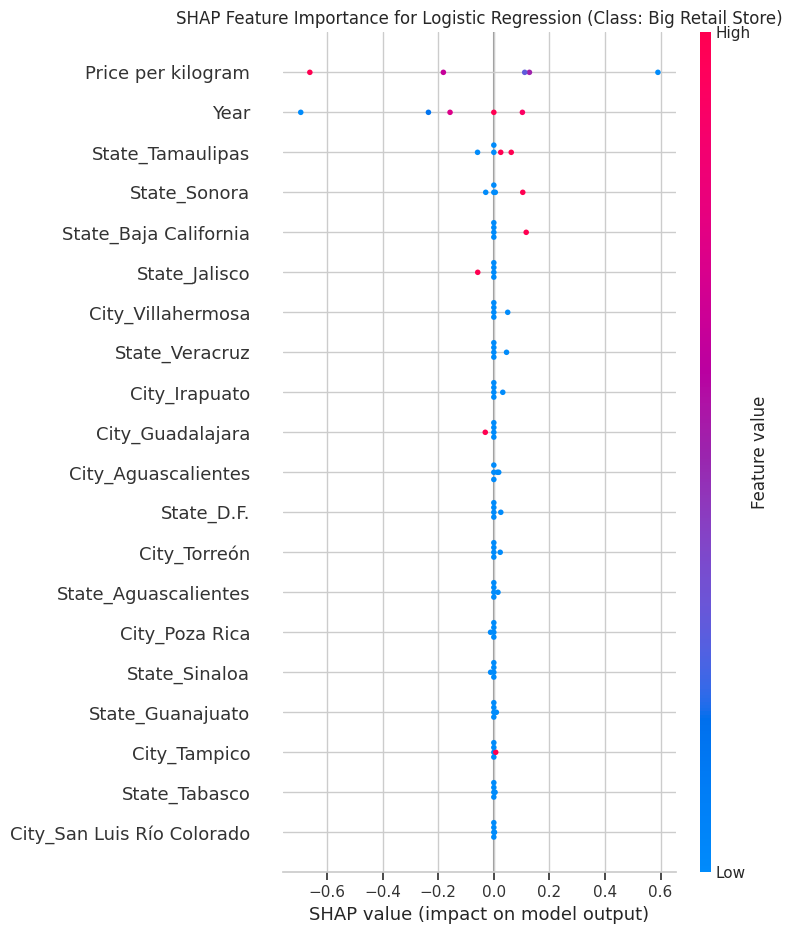


Top 10 features for predicting store type:
                  Feature  Importance
2      Price per kilogram    0.334698
0                    Year    0.238141
30       State_Tamaulipas    0.029218
28           State_Sonora    0.027702
4   State_Baja California    0.023292
17          State_Jalisco    0.011580
84      City_Villahermosa    0.009989
32         State_Veracruz    0.009142
55          City_Irapuato    0.006441
52       City_Guadalajara    0.006166


In [33]:
# Use a very small sample to reduce computational load
np.random.seed(42)  # For reproducibility
sample_size = 100  # Very small sample

# Get a tiny sample from your test set
X_tiny = X_test.sample(sample_size, random_state=42)
y_tiny = y_test.loc[X_tiny.index]

# Get the Logistic Regression model from your pipeline
log_reg_model = pipelines['Logistic Regression'].named_steps['classifier']
preprocessor = pipelines['Logistic Regression'].named_steps['preprocessor']

# Transform the small sample
X_tiny_transformed = preprocessor.transform(X_tiny)

# Convert to dense array if it's sparse
if hasattr(X_tiny_transformed, 'toarray'):
    X_tiny_transformed = X_tiny_transformed.toarray()
X_tiny_transformed = X_tiny_transformed.astype(np.float64)

# Get feature names
ohe = preprocessor.named_transformers_['cat']
if hasattr(ohe, 'get_feature_names_out'):
    cat_feature_names = ohe.get_feature_names_out(categorical_cols)
else:
    # For older scikit-learn versions
    cat_feature_names = ohe.get_feature_names(categorical_cols)
feature_names = numeric_cols + list(cat_feature_names)

# Create a very simple explainer - KernelExplainer is more flexible for Logistic Regression
# Use JUST 10 background samples to minimize computation
background = shap.sample(X_tiny_transformed, 10)

# For multi-class logistic regression, we need to select one class for explanation
# Get the list of classes
class_names = log_reg_model.classes_
print("Available classes:", class_names)

# Select a specific class index to explain (e.g., first class)
class_idx = 0
selected_class = class_names[class_idx]
print(f"Explaining predictions for class: {selected_class}")

# Define prediction function for the selected class
def predict_proba_for_class(X):
    return log_reg_model.predict_proba(X)[:, class_idx]

# Create the explainer with minimal computation
explainer = shap.KernelExplainer(predict_proba_for_class, background, nsamples=50)

# Calculate SHAP values for just 5 test instances to keep computation minimal
shap_values = explainer.shap_values(X_tiny_transformed[:5], nsamples=50)

# Create summary plot with minimal computation
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_tiny_transformed[:5], feature_names=feature_names, show=False)
plt.title(f'SHAP Feature Importance for Logistic Regression (Class: {selected_class})')
plt.tight_layout()
plt.show()

# Show the top 10 most important features based on mean absolute SHAP value
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(shap_values).mean(axis=0)
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print("\nTop 10 features for predicting store type:")
print(feature_importance.head(10))

In [34]:
################################ EXPLAINABLE AI FOR CLASSIFIER- LIME

Instance selected for explanation (index 12801)
True store type: Big Retail Store

Feature values of this instance:
State: Jalisco
City: ZM Guadalajara
Year: 2014
Month: 8
Day: 15
Price per kilogram: 10.9
DayOfWeek: 4
Quarter: 3

Predicted store type: Big Retail Store

Prediction probabilities:
Big Retail Store: 0.5006
Mom and Pop Store: 0.4994


<Figure size 1000x600 with 0 Axes>

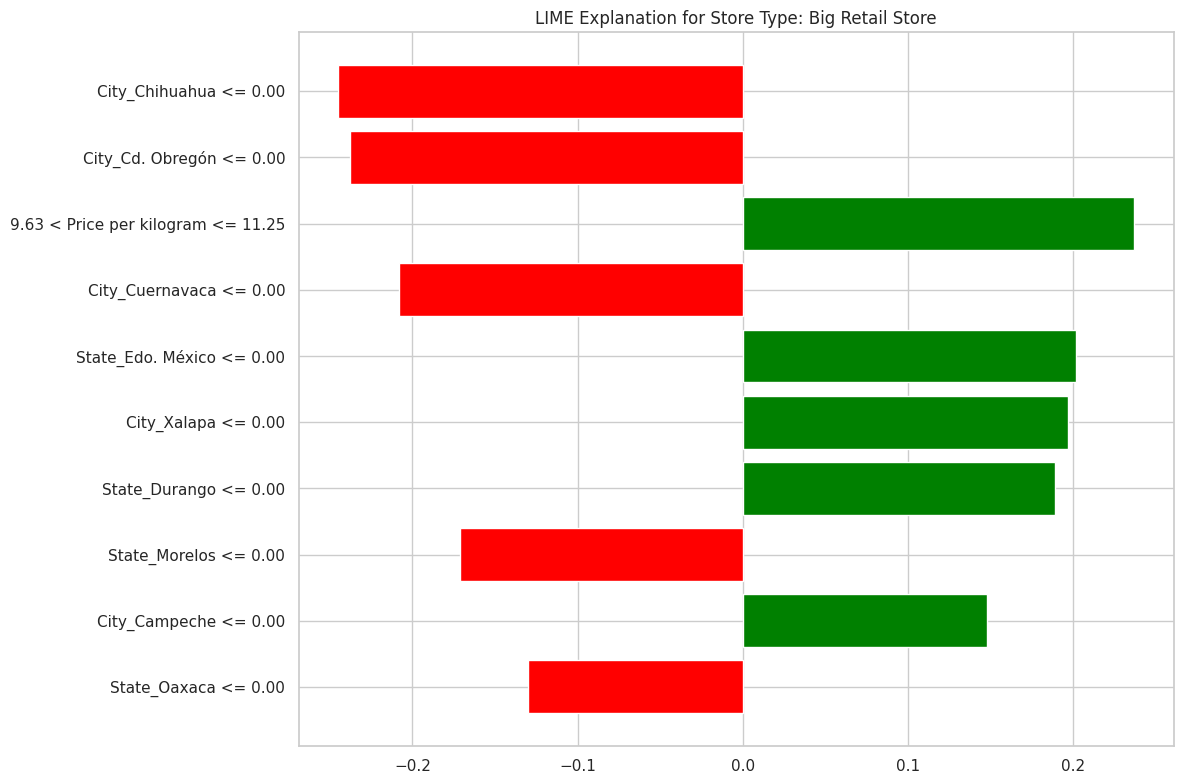


LIME Explanation for prediction Big Retail Store:
City_Chihuahua <= 0.00: -0.2449
City_Cd. Obregón <= 0.00: -0.2378
9.63 < Price per kilogram <= 11.25: 0.2372
City_Cuernavaca <= 0.00: -0.2082
State_Edo. México <= 0.00: 0.2018
City_Xalapa <= 0.00: 0.1970
State_Durango <= 0.00: 0.1890
State_Morelos <= 0.00: -0.1712
City_Campeche <= 0.00: 0.1481
State_Oaxaca <= 0.00: -0.1300


In [35]:


# Use a very small sample to reduce computational load
np.random.seed(42)  # For reproducibility

# Get a single instance to explain
random_idx = np.random.choice(X_test.index)
instance_to_explain = X_test.loc[[random_idx]]
true_label = y_test.loc[random_idx]

print(f"Instance selected for explanation (index {random_idx})")
print(f"True store type: {true_label}")
print(f"\nFeature values of this instance:")
for col in instance_to_explain.columns:
    print(f"{col}: {instance_to_explain[col].values[0]}")

# Get the Logistic Regression model and preprocessor
log_reg_pipeline = pipelines['Logistic Regression']
log_reg_model = log_reg_pipeline.named_steps['classifier']
preprocessor = log_reg_pipeline.named_steps['preprocessor']

# Get predicted probabilities for this instance
predicted_probs = log_reg_pipeline.predict_proba(instance_to_explain)[0]
predicted_class = log_reg_pipeline.predict(instance_to_explain)[0]
print(f"\nPredicted store type: {predicted_class}")

# Get class names
class_names = log_reg_model.classes_

# Print prediction details
print("\nPrediction probabilities:")
for i, cls in enumerate(class_names):
    print(f"{cls}: {predicted_probs[i]:.4f}")

# We need to use a different approach for LIME
# Let's use the numeric features directly and encode categorical features manually

# 1. Create a function to encode categorical features
def encode_categorical(df):
    # Create a copy to avoid modifying the original data
    df_encoded = df.copy()

    # Encode each categorical column
    for col in categorical_cols:
        # Get unique values from training data
        categories = X_train[col].unique()

        # Create dummy variables for each category
        for category in categories:
            dummy_name = f"{col}_{category}"
            df_encoded[dummy_name] = (df[col] == category).astype(int)

        # Drop the original column
        df_encoded = df_encoded.drop(col, axis=1)

    return df_encoded

# 2. Encode the training data
X_train_encoded = encode_categorical(X_train)

# 3. Encode the instance to explain
instance_encoded = encode_categorical(instance_to_explain)

# 4. Function for LIME to use our pipeline with encoded data
def predict_fn(instances):
    # Convert numerical array back to DataFrame with proper column names
    df = pd.DataFrame(instances, columns=X_train_encoded.columns)

    # Create the original format data (un-encode the categorical features)
    original_format = X_train.iloc[0:len(instances)].copy()

    # Fill in numerical features directly
    for col in numeric_cols:
        original_format[col] = df[col].values

    # Fill in categorical features based on dummy variables
    for col in categorical_cols:
        # Find all dummy columns for this categorical feature
        dummy_cols = [c for c in df.columns if c.startswith(f"{col}_")]

        # For each row, find the category with value 1 (or the highest value)
        for i in range(len(instances)):
            row = df.iloc[i]
            # Get the dummy column with the highest value
            values = {c.replace(f"{col}_", ""): row[c] for c in dummy_cols}
            category = max(values, key=values.get)
            original_format.iloc[i, original_format.columns.get_loc(col)] = category

    # Use our pipeline for prediction
    return log_reg_pipeline.predict_proba(original_format)

# 5. Create the LIME explainer with encoded data
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_encoded.values,
    feature_names=X_train_encoded.columns,
    class_names=list(class_names),
    mode='classification',
    random_state=42
)

# 6. Generate explanation for the instance
explanation = explainer.explain_instance(
    data_row=instance_encoded.values[0],
    predict_fn=predict_fn,
    num_features=10,
    top_labels=1,
    num_samples=1000  # Lower sample count for faster computation
)

# 7. Display explanation for the predicted class
pred_class_idx = np.where(class_names == predicted_class)[0][0]
plt.figure(figsize=(10, 6))
explanation.as_pyplot_figure(label=pred_class_idx)
plt.title(f'LIME Explanation for Store Type: {predicted_class}')
plt.tight_layout()
plt.show()

# 8. Print the explanation details
print(f"\nLIME Explanation for prediction {predicted_class}:")
for feature, weight in explanation.as_list(label=pred_class_idx):
    print(f"{feature}: {weight:.4f}")